# Lab 3: Gesture Recognition using Convolutional Neural Networks

In this lab you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Load and split data for training, validation and testing
2. Train a Convolutional Neural Network
3. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1n1QyDPM0gc-FRhmMpz_gW0TKX8ipZw-U?usp=sharing

## Dataset

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing. The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
)

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch
from PIL import Image
from torchvision.transforms.transforms import ToTensor
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset ImageFolder
    Number of datapoints: 2219
    Root location: /content/drive/MyDrive/Colab Notebooks/Lab3 Dataset/Lab3_Gestures_Summer/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


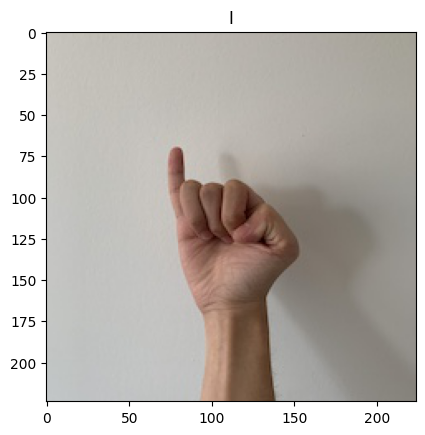

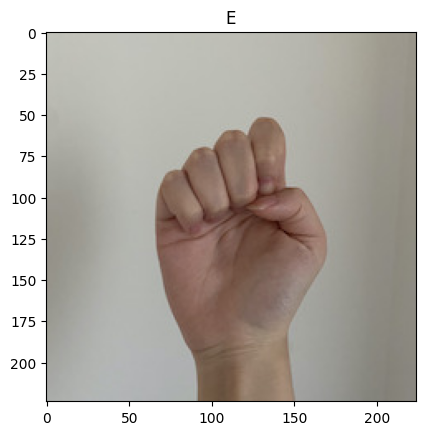

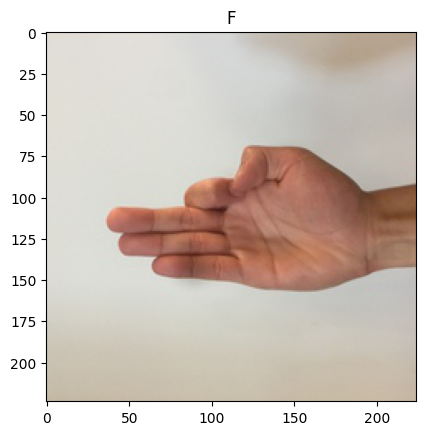

In [ ]:
torch.manual_seed(100) # set the random seed

# define file path and image transformations
root = '/content/drive/MyDrive/Colab Notebooks/Lab3 Dataset/Lab3_Gestures_Summer/'
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    ])
# define the classes
classes = ['A','B','C','D','E','F','G','H','I']

# load data
dataSet = datasets.ImageFolder(root, transform=transform)
print(dataSet)
# Split the data into training, test and validation
trainData, testData, valData = torch.utils.data.random_split(dataSet, [1775,222,222])

# Check the data was loaded properly
# Show the first 3 images of the training data
for i in range(0,3):
    img, label = trainData[i]
    img = img.numpy()
    pic = plt.imshow(np.transpose(img, (1,2,0)))
    plt.title(classes[label])
    plt.show(pic)

In [ ]:
# traning is 80% of the data.
# test and validation are 10% of the data each
# I chose this split as it was described in lecture

print("Training Dataset Size:", len(trainData))
print("Testing Dataset Size:", len(testData))
print("Validation Dataset Size:", len(valData))


Training Dataset Size: 1775
Testing Dataset Size: 222
Validation Dataset Size: 222


### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "CNN"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, 64)
        self.fc2 = nn.Linear(64, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

The model takes in data of size 3x224x224 and conv1 outputs data of size 5x220x220. (i=224, p=0, k=5, s=1)

The max pooling function takes in data of size 5x220x220 and outputs data of size 5x110x110 (i=220, k=2, s=2)

The conv2 function takes in data of size 5x110x110 and outputs data of size 5x106x106 (i=110, p=0, k=5, s=1)

The max pooling function takes in data of size 5x106x106 and outputs data of size 5x53x53 (i=106, k=2, s=2)

I chose to use a convolutional neural network consisting of two convolutional layers followed by max pooling operation to extract hierarchical features from the input image. The pooling layers reduce the dimensions of the input tuple while preserving important features wihtin the picture. After the convolutional layers the data is passed to classifier portion of the neural network which consists of 2 fully connected linear layers which will be able to calssify the hierarchical features extracted by the encoder. Throughout the model the Relu activation function is used to introduce non-linearity to the model. The number of input channels for each layer is calculated based on the output of the previuos channel and pooling layers

### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
def get_model_name(name, batch_size, learning_rate, num_epochs):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   num_epochs)
    return path

###############################################################################
# Evaluate the model on Validation set
def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         acc: A scalar for the avg classification accuracy over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    valAcc = 0.0
    valLoss = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        imgs, labels = data

        # To Enable GPU Usage
        if torch.cuda.is_available():
          imgs = imgs.cuda()
          # labels = labels.cuda()

        outputs = net(imgs)

        if torch.argmax(outputs) == int(labels):
          valAcc += 1
        total_epoch += 1
    valAcc = (float(valAcc / total_epoch))
    valLoss = 1-valAcc
    return valAcc, valLoss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_acc = np.loadtxt("{}_train_acc.csv".format(path))
    val_err = np.loadtxt("{}_val_acc.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Accuracy")
    n = len(train_acc) # number of epochs
    plt.plot(range(1,n+1), train_acc, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

###############################################################################
# Training Network
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(100)

    train_data = torch.utils.data.DataLoader(trainData, batch_size=batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Cross Entropy (CE). In this case we
    # will use the nn.CrossEntropyLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_acc = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################


    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_acc = 0.0
        total_epoch = 0
        for imgs, labels in train_data:
            optimizer.zero_grad()
            #############################################
            # To Enable GPU Usage
            if torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            # Forward pass, backward pass, and optimize
            outputs = net(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy per batch
            _, predicted = torch.max(outputs.data, 1)
            total_train_acc += (predicted == labels).sum().item()
            total_epoch += labels.size(0)

        train_acc[epoch] = (float(total_train_acc / total_epoch))
        train_loss[epoch] = 1-train_acc[epoch]
        val_acc[epoch], val_loss[epoch] = evaluate(net, valData, criterion)

        print(("Epoch {}: Train acc: {:.4}, Train loss: {:.4} | Validation acc: {:.4}, Validation loss: {:.4}").format(
                   epoch + 1,
                   train_acc[epoch],
                   train_loss[epoch],
                   val_acc[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_acc.csv".format(model_path), val_acc)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
smallModel = CNN()

def train_small(net, batch_size=30, learning_rate=0.001, num_epochs=80):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Cross Entropy (CE). In this case we
    # will use the nn.CrossEntropyLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training loss/accuracy
    train_acc = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_acc = 0.0
        total_epoch = 0
        for i, data in enumerate(smallData):

            # Get the inputs
            imgs, labels = data
            labels = torch.tensor(labels, dtype=torch.long)
            labels = labels.view(-1)
            # To Enable GPU Usage
            if torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass, backward pass, and optimize
            outputs = net(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate the statistics
            if torch.argmax(outputs) == int(labels):
              total_train_acc += 1
            total_epoch += 1
        train_acc[epoch] = (float(total_train_acc / total_epoch))
        train_loss[epoch] = 1-train_acc[epoch]

        print(("Epoch {}: Train acc: {:.4}, Train loss: {:.4}").format(
                  epoch + 1,
                  train_acc[epoch],
                  train_loss[epoch],))

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)

# create a smaller set of data to train on by taking a subset of train data
smallData = []
i=0
while i < 30:
  smallData.append(trainData[i])
  i+=1
smallModel.cuda()
train_small(smallModel, batch_size=30, learning_rate=0.001, num_epochs=80)

Epoch 1: Train acc: 0.1, Train loss: 0.9
Epoch 2: Train acc: 0.1667, Train loss: 0.8333
Epoch 3: Train acc: 0.2333, Train loss: 0.7667
Epoch 4: Train acc: 0.2, Train loss: 0.8
Epoch 5: Train acc: 0.1333, Train loss: 0.8667
Epoch 6: Train acc: 0.2, Train loss: 0.8
Epoch 7: Train acc: 0.2, Train loss: 0.8
Epoch 8: Train acc: 0.2, Train loss: 0.8
Epoch 9: Train acc: 0.2, Train loss: 0.8
Epoch 10: Train acc: 0.2, Train loss: 0.8
Epoch 11: Train acc: 0.2, Train loss: 0.8
Epoch 12: Train acc: 0.2, Train loss: 0.8
Epoch 13: Train acc: 0.2, Train loss: 0.8
Epoch 14: Train acc: 0.2, Train loss: 0.8
Epoch 15: Train acc: 0.2, Train loss: 0.8
Epoch 16: Train acc: 0.2, Train loss: 0.8
Epoch 17: Train acc: 0.2, Train loss: 0.8
Epoch 18: Train acc: 0.2, Train loss: 0.8
Epoch 19: Train acc: 0.2, Train loss: 0.8
Epoch 20: Train acc: 0.2, Train loss: 0.8
Epoch 21: Train acc: 0.2, Train loss: 0.8
Epoch 22: Train acc: 0.2, Train loss: 0.8
Epoch 23: Train acc: 0.2, Train loss: 0.8
Epoch 24: Train acc: 0.2,

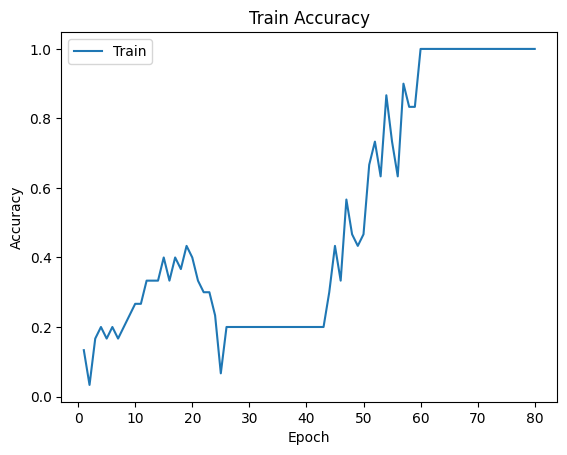

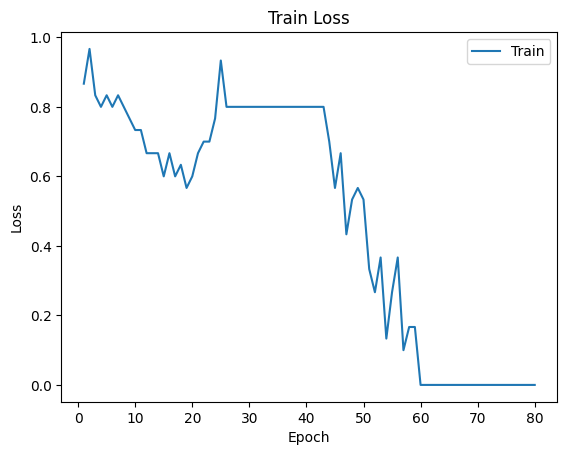

In [ ]:
def plot_small_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_acc = np.loadtxt("{}_train_acc.csv".format(path))
    # val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    # val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train Accuracy")
    n = len(train_acc) # number of epochs
    plt.plot(range(1,n+1), train_acc, label="Train")
    # plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    # plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

model_path1 = get_model_name("CNN", batch_size=30, learning_rate=0.001, num_epochs=79)
plot_small_training_curve(model_path1)

### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

I am going to tune:

Number of convolutional and pool layers

Number of Epochs

learning rate

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

Epoch 1: Train acc: 0.129, Train loss: 0.871 | Validation acc: 0.1441, Validation loss: 0.8559
Epoch 2: Train acc: 0.1814, Train loss: 0.8186 | Validation acc: 0.2117, Validation loss: 0.7883
Epoch 3: Train acc: 0.2518, Train loss: 0.7482 | Validation acc: 0.3198, Validation loss: 0.6802
Epoch 4: Train acc: 0.387, Train loss: 0.613 | Validation acc: 0.473, Validation loss: 0.527
Epoch 5: Train acc: 0.5211, Train loss: 0.4789 | Validation acc: 0.545, Validation loss: 0.455
Epoch 6: Train acc: 0.5803, Train loss: 0.4197 | Validation acc: 0.5856, Validation loss: 0.4144
Epoch 7: Train acc: 0.622, Train loss: 0.378 | Validation acc: 0.6036, Validation loss: 0.3964
Epoch 8: Train acc: 0.6293, Train loss: 0.3707 | Validation acc: 0.6396, Validation loss: 0.3604
Epoch 9: Train acc: 0.6682, Train loss: 0.3318 | Validation acc: 0.6216, Validation loss: 0.3784
Epoch 10: Train acc: 0.6293, Train loss: 0.3707 | Validation acc: 0.6126, Validation loss: 0.3874
Epoch 11: Train acc: 0.6439, Train loss

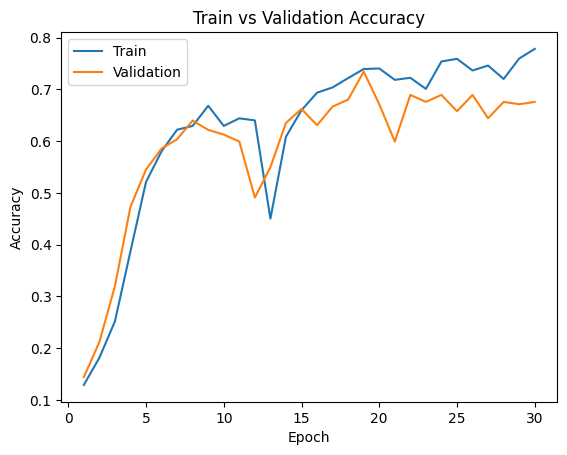

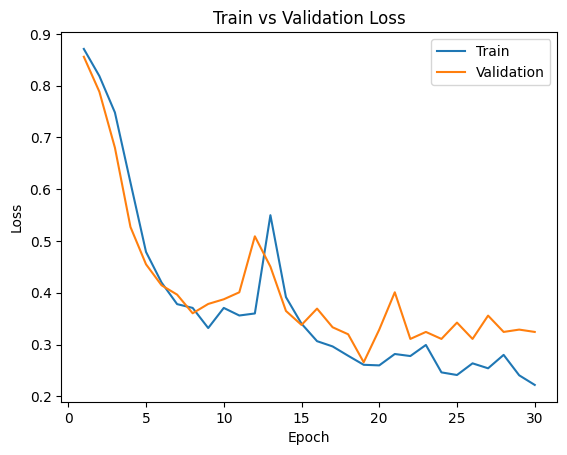

In [ ]:
model1 = CNN()
model1.cuda()
train_net(model1, batch_size=128, learning_rate=0.01, num_epochs=30)
path1 = get_model_name("CNN", batch_size=128, learning_rate=0.01, num_epochs=29)
plot_training_curve(path1)

Epoch 1: Train acc: 0.1104, Train loss: 0.8896 | Validation acc: 0.1081, Validation loss: 0.8919
Epoch 2: Train acc: 0.1104, Train loss: 0.8896 | Validation acc: 0.1081, Validation loss: 0.8919
Epoch 3: Train acc: 0.1104, Train loss: 0.8896 | Validation acc: 0.1081, Validation loss: 0.8919
Epoch 4: Train acc: 0.1104, Train loss: 0.8896 | Validation acc: 0.1081, Validation loss: 0.8919
Epoch 5: Train acc: 0.1054, Train loss: 0.8946 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 6: Train acc: 0.1189, Train loss: 0.8811 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 7: Train acc: 0.1155, Train loss: 0.8845 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 8: Train acc: 0.1155, Train loss: 0.8845 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 9: Train acc: 0.1155, Train loss: 0.8845 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 10: Train acc: 0.1155, Train loss: 0.8845 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 11: Train acc: 0.1155, 

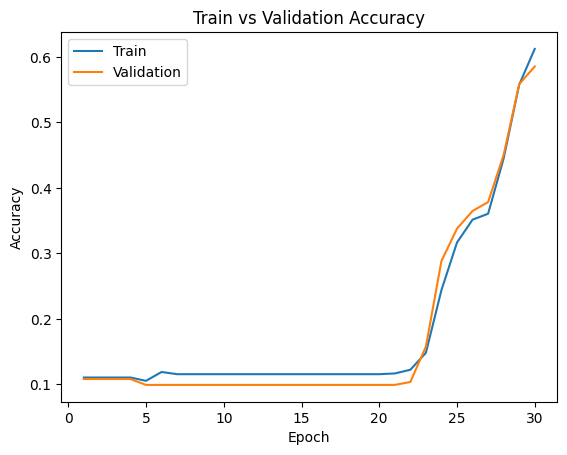

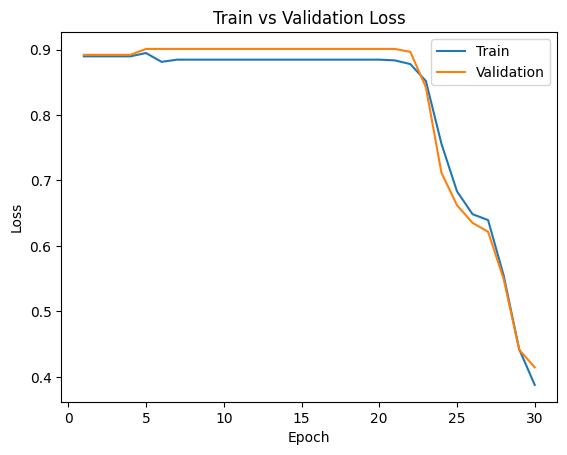

In [ ]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.name = "CNN2"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 5, 5)
        self.conv3 = nn.Conv2d(5, 10, 4)
        self.fc1 = nn.Linear(10 * 25 * 25, 64)
        self.fc2 = nn.Linear(64, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 10 * 25 * 25)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

model2 = CNN2()
model2.cuda()
train_net(model2, batch_size=256, learning_rate=0.01, num_epochs=60)
path1 = get_model_name("CNN2", batch_size=256, learning_rate=0.01, num_epochs=59)
plot_training_curve(path1)

Epoch 1: Train acc: 0.7431, Train loss: 0.2569 | Validation acc: 0.7027, Validation loss: 0.2973
Epoch 2: Train acc: 0.7775, Train loss: 0.2225 | Validation acc: 0.7117, Validation loss: 0.2883
Epoch 3: Train acc: 0.778, Train loss: 0.222 | Validation acc: 0.7162, Validation loss: 0.2838
Epoch 4: Train acc: 0.7989, Train loss: 0.2011 | Validation acc: 0.6982, Validation loss: 0.3018
Epoch 5: Train acc: 0.8062, Train loss: 0.1938 | Validation acc: 0.7523, Validation loss: 0.2477
Epoch 6: Train acc: 0.8321, Train loss: 0.1679 | Validation acc: 0.7703, Validation loss: 0.2297
Epoch 7: Train acc: 0.8315, Train loss: 0.1685 | Validation acc: 0.7207, Validation loss: 0.2793
Epoch 8: Train acc: 0.8282, Train loss: 0.1718 | Validation acc: 0.7297, Validation loss: 0.2703
Epoch 9: Train acc: 0.8361, Train loss: 0.1639 | Validation acc: 0.7568, Validation loss: 0.2432
Epoch 10: Train acc: 0.8394, Train loss: 0.1606 | Validation acc: 0.7387, Validation loss: 0.2613
Epoch 11: Train acc: 0.8637, Tr

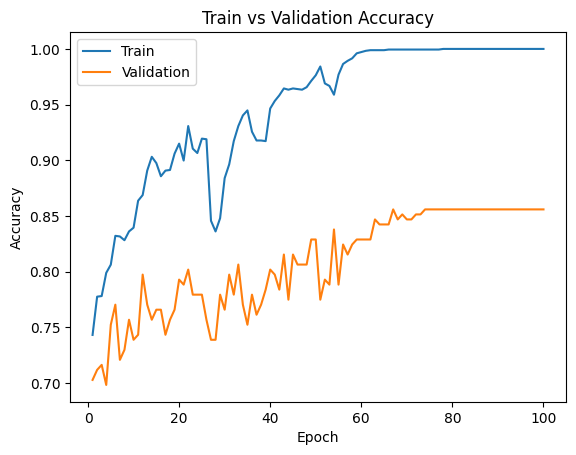

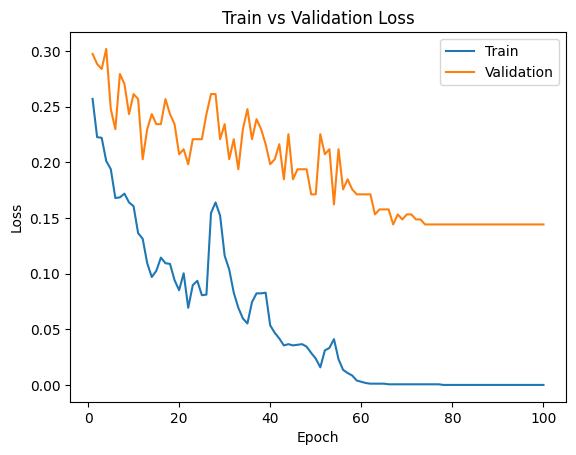

In [ ]:
model3 = CNN2()
model3.cuda()
train_net(model2, batch_size=256, learning_rate=0.01, num_epochs=100)
path1 = get_model_name("CNN2", batch_size=256, learning_rate=0.01, num_epochs=99)
plot_training_curve(path1)

Epoch 1: Train acc: 0.1093, Train loss: 0.8907 | Validation acc: 0.1216, Validation loss: 0.8784
Epoch 2: Train acc: 0.1093, Train loss: 0.8907 | Validation acc: 0.1216, Validation loss: 0.8784
Epoch 3: Train acc: 0.1076, Train loss: 0.8924 | Validation acc: 0.1351, Validation loss: 0.8649
Epoch 4: Train acc: 0.1076, Train loss: 0.8924 | Validation acc: 0.1126, Validation loss: 0.8874
Epoch 5: Train acc: 0.111, Train loss: 0.889 | Validation acc: 0.1216, Validation loss: 0.8784
Epoch 6: Train acc: 0.1335, Train loss: 0.8665 | Validation acc: 0.1036, Validation loss: 0.8964
Epoch 7: Train acc: 0.1161, Train loss: 0.8839 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 8: Train acc: 0.1155, Train loss: 0.8845 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 9: Train acc: 0.1155, Train loss: 0.8845 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 10: Train acc: 0.1155, Train loss: 0.8845 | Validation acc: 0.0991, Validation loss: 0.9009
Epoch 11: Train acc: 0.1155, Tr

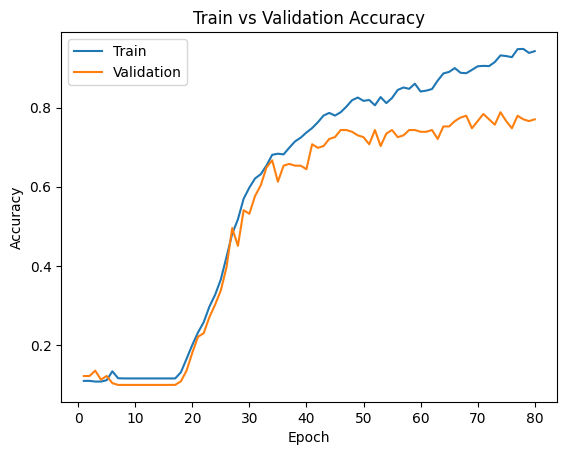

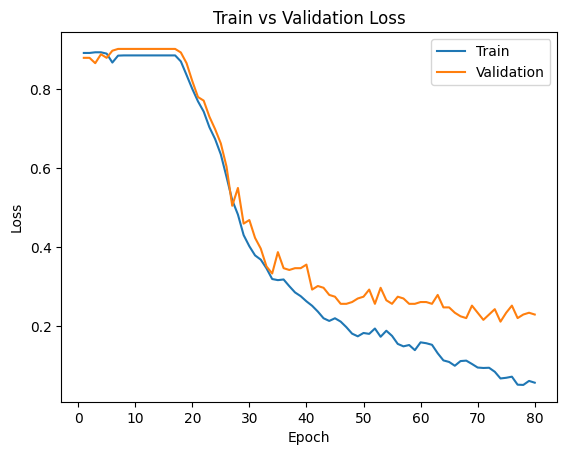

In [ ]:
model4 = CNN2()
model4.cuda()
train_net(model4, batch_size=256, learning_rate=0.008, num_epochs=80)
path1 = get_model_name("CNN2", batch_size=256, learning_rate=0.008, num_epochs=79)
plot_training_curve(path1)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

The best model was model 4 as even though it has a lower validation accuracy than model 3, model overfits to the data whereas model 4 doesnt.

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
from skimage.util.dtype import img_as_ubyte
# Evaluate the model on Test set
def evaluateTest(net, loader):
    """ Evaluate the network on the test set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the test set
     Returns:
         acc: A scalar for the avg classification accuracy over the test set
         loss: A scalar for the average loss function over the test set
     """
    valAcc = 0.0
    valLoss = 0.0
    total = 0
    for i, data in enumerate(loader, 0):
        imgs, labels = data

        # To Enable GPU Usage
        if torch.cuda.is_available():
          imgs = imgs.cuda()

        outputs = net(imgs)

        if torch.argmax(outputs) == int(labels):
          valAcc += 1
        total += 1
    valAcc = (float(valAcc / total))
    valLoss = 1-valAcc
    return valAcc, valLoss

acc, loss = evaluateTest(model4, testData)

print("Test Accuracy: {} | Test Loss: {}". format(acc, loss))

Test Accuracy: 0.7927927927927928 | Test Loss: 0.2072072072072072


### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 86.6MB/s]


The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
train_data = []
val_data = []
test_data = []

for imgs, labels in torch.utils.data.DataLoader(trainData, batch_size=1):
  trainFeatures = alexnet.features(imgs)
  trainFeatures = torch.from_numpy(trainFeatures.detach().numpy())
  train_data.append((trainFeatures, labels))

for imgs, labels in torch.utils.data.DataLoader(valData, batch_size=1):
  valFeatures = alexnet.features(imgs)
  valFeatures = torch.from_numpy(valFeatures.detach().numpy())
  val_data.append((valFeatures, labels))


for imgs, labels in torch.utils.data.DataLoader(testData, batch_size=1):
  testFeatures = alexnet.features(imgs)
  testFeatures = torch.from_numpy(testFeatures.detach().numpy())
  test_data.append((testFeatures, labels))


**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
# output = model(features)
# prob = F.softmax(output)

class alex_CNN(nn.Module):
    def __init__(self):
        super(alex_CNN, self).__init__()
        self.name = "alex_CNN"
        self.conv1 = nn.Conv2d(256, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 2 * 2, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 256 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

print(train_data[0])

(tensor([[[[0.0000, 0.3232, 0.3232, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.6101, 1.6101, 0.6108, 0.0000, 0.0000],
          [0.0000, 1.1421, 1.1421, 0.6108, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.4446, 0.7160, 0.1298, 0.0000, 0.0000],
          [0.0000, 1.0181, 1.0181, 0.1298, 0.0000, 0.0000],
          [0.0000, 0.0454, 0.3521, 1.4700, 1.4700, 0.0000],
          [0.0000, 0.4900, 3.1142, 

I made a convolutional nueral network consisting of 1 convolutional layer followed by a max pooling layer. I chose to only use 1 convolutional layer because the alex network has already gone over the images and extracted the important features so I dont need multiple layers now to extract features. I then pass the data to the calssifier which consists of 2 fully connected layers which will classify the data based on the features extracted by the encoder. Throughout the model the Relu activation function is used to introduce non-linearity to the model. The number of input channels for each layer is calculated based on the output of the previuos channel and pooling layers.

### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
alexModel = alex_CNN()

# tensor = torch.from_numpy(tensor.detach().numpy())

def train_alex(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(100)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Cross Entropy (CE). In this case we
    # will use the nn.CrossEntropyLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_acc = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################

    print(train_data[0])
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_acc = 0.0
        total_epoch = 0
        # for imgs, labels in train_data:
        for imgs, labels in train_data:  # Iterate over the samples in train_data
            optimizer.zero_grad()
            #############################################
            # To Enable GPU Usage
            if torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            # Forward pass, backward pass, and optimize
            outputs = net(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy per batch
            _, predicted = torch.max(outputs.data, 1)
            total_train_acc += (predicted == labels).sum().item()
            total_epoch += labels.size(0)

        train_acc[epoch] = (float(total_train_acc / total_epoch))
        train_loss[epoch] = 1-train_acc[epoch]
        val_acc[epoch], val_loss[epoch] = evaluate_alex(net, val_data, criterion)

        print(("Epoch {}: Train acc: {:.4}, Train loss: {:.4} | Validation acc: {:.4}, Validation loss: {:.4}").format(
                   epoch + 1,
                   train_acc[epoch],
                   train_loss[epoch],
                   val_acc[epoch],
                   val_loss[epoch]))
                # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_acc.csv".format(model_path), val_acc)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

def evaluate_alex(net, loader, criterion):
    valAcc = 0.0
    valLoss = 0.0
    total_epoch = 0
    for imgs, labels in loader:
        # imgs, labels = data

        # To Enable GPU Usage
        if torch.cuda.is_available():
          imgs = imgs.cuda()

        outputs = net(imgs)

        if torch.argmax(outputs) == int(labels):
          valAcc += 1
        total_epoch += 1
    valAcc = (float(valAcc / total_epoch))
    valLoss = 1-valAcc
    return valAcc, valLoss
alexModel.cuda()
train_alex(alexModel, batch_size=128, learning_rate=0.01, num_epochs=30)
path1 = get_model_name("alex_CNN", batch_size=128, learning_rate=0.01, num_epochs=29)
plot_training_curve(path1)

(tensor([[[[0.0000, 0.3232, 0.3232, 0.0000, 0.0000, 0.0000],
          [0.0000, 1.6101, 1.6101, 0.6108, 0.0000, 0.0000],
          [0.0000, 1.1421, 1.1421, 0.6108, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.4446, 0.7160, 0.1298, 0.0000, 0.0000],
          [0.0000, 1.0181, 1.0181, 0.1298, 0.0000, 0.0000],
          [0.0000, 0.0454, 0.3521, 1.4700, 1.4700, 0.0000],
          [0.0000, 0.4900, 3.1142, 

KeyboardInterrupt: ignored

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [ ]:
acc, loss = evaluateTest(alexModel, test_data)

print("Test Accuracy: {} | Test Loss: {}". format(acc, loss))

Test Accuracy: 0.13063063063063063 | Test Loss: 0.8693693693693694


The test accuracy is lower than in 3d, but im pretty sure that due to an error in me training the model and not the model itself. However, I'm not sure whats wrong :(

### 5. Additional Testing [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures.

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

In [ ]:
small_data = []

for imgs, labels in torch.utils.data.DataLoader(smallData, batch_size=1):
  trainFeatures = alexnet.features(imgs)
  trainFeatures = torch.from_numpy(trainFeatures.detach().numpy())
  small_data.append((trainFeatures, labels))



In [ ]:
acc, loss = evaluateTest(alexModel, small_data)

print("Test Accuracy: {} | Test Loss: {}". format(acc, loss))

Test Accuracy: 0.06666666666666667 | Test Loss: 0.9333333333333333


Again this accuracy is much worse but i suspect this is due to improper training.